 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

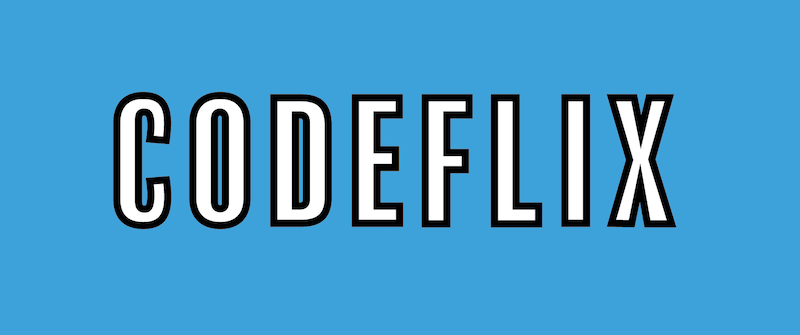

In [5]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'
display(Image(generic_image))


In [6]:
class Video:
    def __init__(self):
        self.title = "" # or None
        self.length = timedelta()
        self.link = generic_image
    def play(self):
        print(f"Now Playing {self.title}")
        display(Image(self.link))

    def pause(self):
        print("Video Paused")
    
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."

Now Playing Cool Video


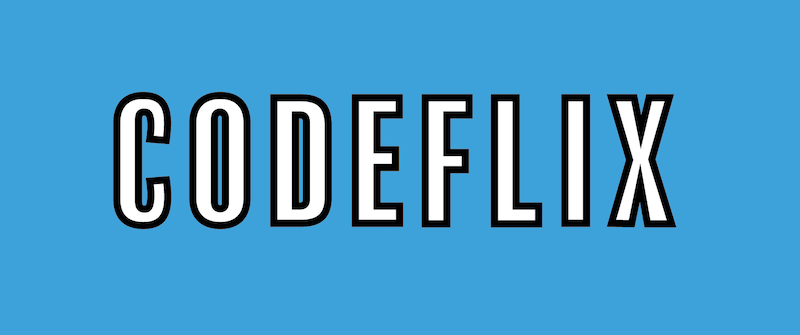

'Cool Video is 0 seconds long.'

In [7]:
vid = Video()
vid.title = "Cool Video"  # can't do vid = Video("Cool Video") b/c didn't establish self, name

vid.play()
Video.__repr__(vid) # 'Cool Video is 0 seconds long.'
# the init is always the function that is called 


In [27]:
# class Other:
#     def __init__(self):
#         self.other = "thing"

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [33]:
# class Movie(Video, Other):
#     def __init__(self):
#         super().__init__()
        
# example = Movie()
# print(example.title)
# print(example.other)

# class Commercial(Video):
#     def pause(self):
#         return 'this action is unavailable'

In [21]:
class Movie(Video): 
    pass
class Commercial(Video):
    pass
# all of these will need what Video has, 
# but video doesn't need what commercial has

In [8]:
# class child(parent) child will be like the parent
# all videos are episodes but not all episodes are videos

class Episode(Video): #inheriting "Video"
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season= data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.length = timedelta(minutes = data['runtime'])
        self.title = data['name']
        if data['image']:
            self.link = data['image']['medium'] 
        
        
        

In [9]:
# ep1 = Episode()
# ep1.play()

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [14]:
class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.genres = []
        self.episodes = []
        
    def get_info(self, query = ''):
        data = None
        while not data:
            if not query:
                query = input("What is the name of the series? ")
            r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series Error: status code {r.status_code}")
                query = ''
        
        # use data to fill attributes
        self.id = data['id']
        self.title = data['name']
        self.genres = data['genres']
        self.summary = data['summary']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']

        # API Call for episodes
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f'Episode Error: status code {r.status_code}')
            return
        
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes.")
     
    
    def play(self):
        start = 0
        choose_episode = input("Do you want to start from a specific episode number? y/n ")
        if choose_episode == 'y':
            start = int(input("Which episodes? (enter number) "))
            start -= 1
        for i in range(start, len(self.episodes)):
            if self.episodes:
                self.episodes[i].play()
            if i > start and i - start % 3:
                watching = input("Are you still watching? y/n: ")
                if watching.lower().strip() not in ('yes','y','sure'):
                    break
        self.episodes[i].play()
        sleep(self.episodes[i].length.seconds/1000)
        

    def __len__(self):
        return len(self.episodes)

    def __repr__(self):
        return f"Title: {self.title}"




In [ ]:
# first_show = Series()
# first_show.get_info()
# first_show.play()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [ ]:
len(first_show)

In [15]:
class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    
    # add_user 
    def add_user(self, name=''):
        if not name:
            name = input('What is the name of your new user? ')
        self.users.append(name)
        self.choose_user()
            
    # choose_user
    def choose_user(self):
        while True:
            print('Users:')
            for user in self.users:
                print(user)
            current = input('Choose a user: ')
            if current in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a user.")
            
    # add_to_watch_list
    def add_to_watch_list(self, query=""):
        show = Series()
        show.get_info(query)
        self.watch_list.append(show)
        print(f"{show.title} has been added to the watchlist")
    
    # choose_from_watch_list
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n{series.summary}")
            display(Image(series.episodes[0].link))
            
        watch = input('What series do you want to watch? ')
        
        if watch.lower() in list(map( lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.play()
    
                else:   
                    response = input(f'{watch} is not in your watch list. Would you like to add it? y/n ')
                    if response in ('yes','y'):
                        self.add_to_watch_list(watch)
                        self.watch_list[-1].play()

    # run 
    def run(self):
        """
            Method allowing users to choose a series and play episodes.
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input('Create a profile: ')
            self.add_user(name)
            self.current_user = name
        print(self.current_user)
        print("""
            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from your watch list
            Add    - Add a new user
            Quit   - Close the app
        """)
        
        while True:
            response = input('What would you like to do (search, watch, add, quit)')
            
            if response.lower() == "search":
                self.add_to_watch_list()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "quit":
                print(f"Thanks for watching {self.current_user}.")
                break
            else:
                print('Incorrect input... Try again.')
                

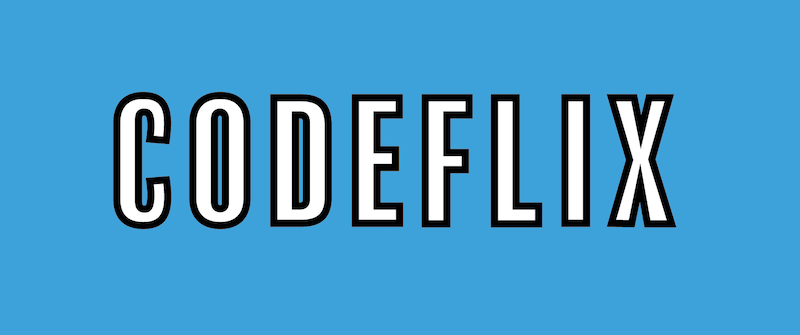

Create a profile: tatiana
Users:
tatiana
Choose a user: tatiana
tatiana

            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from your watch list
            Add    - Add a new user
            Quit   - Close the app
        
What would you like to do (search, watch, add, quit)search
What is the name of the series? the office
The Office has 202 episodes.
The Office has been added to the watchlist
What would you like to do (search, watch, add, quit)watch


Title: The Office | Episodes: 202

Summary: 
<p>Steve Carell stars in <b>The Office</b>, a fresh and funny mockumentary-style glimpse into the daily interactions of the eccentric workers at the Dunder Mifflin paper supply company. Based on the smash-hit British series of the same name and adapted for American Television by Greg Daniels, this fast-paced comedy parodies contemporary American water-cooler culture. Earnest but clueless regional manager Michael Scott

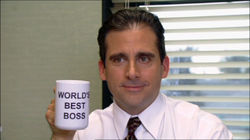

What series do you want to watch? the office
Do you want to start from a specific episode number? y/n y
Which episodes? (enter number) 6
Now Playing Hot Girl


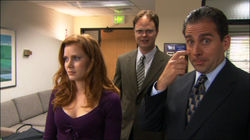

Now Playing The Dundies


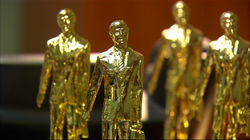

In [ ]:
codeflix = Theater()
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

# Homework
<p>Create new classes, methods and/or attributes to improve the theater class from today using OOP Principles. 

Explain your decision to add the feature, or how your code improves the existing class.</p>

In [3]:
class Garage():

    def __init__(self, tickets, parkingSpaces):
        self.tickets = len(int[tickets]) # tickets available, correlates with parkingSpaces.
        self.parkingSpaces = len(int[parkingSpaces]) # paid/unpaid
        self.currentTicket = {} # keys: tickets,
    

    def takeTicket(self): # take a ticket and add to currentTicket, take out from tickets and parkingSpaces
        if self.tickets <= 0:
            print("This parking garage is full!")
        else:
            tix = self.tickets[0]
            print(f"Please take ticket: {tix}")
            self.tickets.pop[tix]
            self.currentTicket[tix] = False 
            print(f"Parking spots taken: {self.currentTicket}")
            self.parkingSpaces.pop[tix]
            print(f"Parking spaces available: {self.parkingSpaces}")
            
            
    def run_garage(self):
        while True:
            print("""
            
            Welcome to the parking garage. 
            What would you like to do?
            [1] park
            [2] pay
            [3] leave
            
            """)

            response = int(input("Choose your option: "))
            if response == 1 :
                self.takeTicket()
            elif response == 2 :
                self.payForParking()
            elif response == 3 :
                self.leaveGarage()

            else: 
                print("That is not a valid option: please choose 1, 2, or 3")


TheShoppesGarage = Garage(15,15)

TheShoppesGarage.run_garage()


TypeError: 'type' object is not subscriptable